In [1]:
!jupyter trust WriteUp.ipynb

Notebook already signed: WriteUp.ipynb


## <u> DATA 110 Final Project Write Up </u>
## Group Members: Dan Shallal, Daniel Wang, Devarshi Dave, & Michael Gaines
## Dataset: Track B Dataset: Child Mortality of 0-5 Year Olds per 1000 born

<u> Defining the problem- </u>

After choosing the track B, we <i> initially </i> reasoned that the data set could ask a vaguer question in “How do child mortality rates fluctuate between various countries and over time?”. We chose this dataset from track B because we were interested in understanding how child mortality rates differ between different countries and whether there is an underlying factor that accurately predicts how child mortality rates differ between countries. Disease, lack of nutrition, limited healthcare, and other internal and external issues that have plagued how children grow physically. We sincerely believe that our project can investigate the current situation of each region of the world, in terms of whether their child mortality rates have changed, in what ways the rates have changed, and how each region compares to others in order to recognize potential inequalities that need to be addressed. After our first data visualization created during the project proposal and the feedback given to our group afterwards, we decided to make our question more specific, being, "How do countries being in different regions and time periods affect their child mortality rates?". Our hypothesis is that the more recent the year and the more developed a region is (higher developmental index like HDI), the lower the child mortality rate.

In [2]:
# Import Python pandas
import pandas as pd
# Load the csv into a pandas dataframe
dataset = pd.read_csv("child_mortality.csv")
# Read out all the countries within the dataset
all_countries = dataset["country"].tolist()
print(all_countries)
# Number of samples and key features
print(len(dataset), len(dataset.columns))

['Afghanistan', 'Angola', 'Albania', 'Andorra', 'UAE', 'Argentina', 'Armenia', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.', 'Gabon', 'UK', 'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hong Kong, China', 'Honduras', 'Holy See', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'India', '

<u> Data Collection- </u>

Our dataset comes from Gapminder, a non-profit organization that aims to aid global sustainability by providing statistics and data on different parts of the world over hundreds of years. Gapminder compiled the dataset from multiple sources they deemed to be accurate and useful. Three independent sources were used for the dataset, including one from UNIGME (a collaboration by UNICEF, WHO, UN Population, and the World Bank). The first source uses data from mortality.org, a leading database on human mortality over centuries, and a series of books on historical statistics. The second and third are from world organizations like the UN, who provide estimates from ~1950 on how child mortality in all parts of the world has changed. Gapminder then combined the data sets by filling in blanks in terms of years that datasets had with the others, and by taking weighted averages of the overlap that were similar. The population of the dataset is people from around 1800 to 2100, but this highlights a potential limitation in what we can conclude from this dataset in that because it also looks to predict data in the future, it may be that the data previous to that is not 100% accurate and is also filling in gaps like it does for the future. In addition, though Gapminder compiles to their best ability, the combining of data may still cause some bias/inaccuracy to occur as the sources are different which possibly causes what we’ve noticed about empty rows for different countries. In addition, combining different sources may cause bias in that different sources include or disclude certain variables that may skew the final dataset. In fact, different countries did not exist in terms of history, where some countries were technically part of another, which makes characterizing child mortality changes for some countries possibly inaccurate as borders changed. However, because we are going by region for our question/problem, this may be mitigated. Within the dataset are 197 samples, being all countries in the world, and there are 302 key features, all being years that start from 1800 to 2100 and the country name.

In [3]:
def preparer(df):
    # Clean dataset by having any rows with empty columns removed and reset indexing
    cleaned_dataset = df.dropna().reset_index(drop=True)
    # Change death amount to percentage
    for column in cleaned_dataset.columns:
        # Skip country column
        if column != "country":
            cleaned_dataset[column] /= 1000
    # Create an empty column for a region to be assigned to each country
    cleaned_dataset["Region"] = None
    # Create the regions in hashsets (fast lookup time, but can be done with lists)
    region_1 = {"Mexico", "Belize", "Costa Rica", "El Salvador", "Guatemala", "Honduras", "Nicaragua", "Panama"}
    region_2 = {"Algeria", "Egypt", "Libya", "Morocco", "Sudan", "Tunisia"}
    region_3 = {"Benin", "Burkina Faso", "Cape Verde", "Cote d'Ivoire", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Liberia", "Mali", "Mauritania", "Niger", "Nigeria", "Senegal", "Sierra Leone", "Togo"}
    region_4 = {"Burundi", "Comoros", "Djibouti", "Eritrea", "Ethiopia", "Kenya", "Madagascar", "Malawi", "Mauritius", "Mozambique", "Rwanda", "Seychelles", "Somalia", "South Sudan", "Tanzania", "Uganda", "Zambia", "Zimbabwe"}
    region_5 = {"Angola", "Cameroon", "Central African Republic", "Chad", "Congo, Dem. Rep.", "Congo, Rep.", "Equatorial Guinea", "Gabon", "Sao Tome and Principe"}
    region_6 = {"Botswana", "Eswatini", "Lesotho", "Namibia", "South Africa"}
    region_7 = {"Austria", "Belgium", "France", "Germany", "Ireland", "Liechtenstein", "Luxembourg", "Monaco", "Netherlands", "Switzerland", "UK"}
    region_8 = {"Denmark", "Estonia", "Finland", "Iceland", "Latvia", "Lithuania", "Norway", "Sweden"}
    region_9 = {"Belarus", "Bulgaria", "Czech Republic", "Hungary", "Moldova", "Poland", "Romania", "Russia", "Slovak Republic", "Ukraine"}
    region_10 = {"Albania", "Andorra", "Bosnia and Herzegovina", "Croatia", "Cyprus", "Greece", "Italy", "Kosovo", "Malta", "Montenegro", "North Macedonia", "Portugal", "San Marino", "Serbia", "Slovenia", "Spain", "Vatican City"}
    region_11 = {"Armenia", "Azerbaijan", "Bahrain", "Cyprus", "Egypt", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "Turkey", "Georgia", "UAE", "Yemen"}
    region_12 = {"Hong Kong", "China", "Japan", "Mongolia", "North Korea", "South Korea", "Taiwan", "Kazakhstan", "Kyrgyz Republic", "Tajikistan", "Turkmenistan", "Uzbekistan"}
    region_13 = {"Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"}
    region_14 = {"Vietnam", "Timor-Leste", "Lao", "Brunei", "Indonesia", "Malaysia", "Myanmar", "Philippines", "Thailand", "Singapore", "Cambodia"}
    region_15 = {"Cuba", "Dominican Republic", "Haiti", "Jamaica", "Trinidad and Tobago", "Barbados", "St. Lucia", "St. Vincent and the Grenadines", "Grenada", "Antigua and Barbuda", "Saint Kitts and Nevis", "Dominica", "Bahamas"}
    region_16 = {"Australia", "New Zealand", "Papua New Guinea", "Fiji", "Solomon Islands", "Vanuatu", "Samoa", "Tonga", "Kiribati", "Marshall Islands", "Palau", "Micronesia, Fed. Sts.", "Nauru", "Tuvalu"}
    region_17 = {"Canada", "USA"}
    region_18 = {"Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"}

    # Iterate through each row to assign a region (based on development)
    for i in range(len(cleaned_dataset)):
        country = cleaned_dataset.loc[i, "country"]
        if country in region_1:
            cleaned_dataset.loc[i, "Region"] = 12
        elif country in region_2:
            cleaned_dataset.loc[i, "Region"] = 15
        elif country in region_3:
            cleaned_dataset.loc[i, "Region"] = 16
        elif country in region_4:
            cleaned_dataset.loc[i, "Region"] = 17
        elif country in region_5:
            cleaned_dataset.loc[i, "Region"] = 18
        elif country in region_6:
            cleaned_dataset.loc[i, "Region"] = 14
        elif country in region_7:
            cleaned_dataset.loc[i, "Region"] = 2
        elif country in region_8:
            cleaned_dataset.loc[i, "Region"] = 3
        elif country in region_9:
            cleaned_dataset.loc[i, "Region"] = 7
        elif country in region_10:
            cleaned_dataset.loc[i, "Region"] = 5
        elif country in region_11:
            cleaned_dataset.loc[i, "Region"] = 6
        elif country in region_12:
            cleaned_dataset.loc[i, "Region"] = 8
        elif country in region_13:
            cleaned_dataset.loc[i, "Region"] = 10
        elif country in region_14:
            cleaned_dataset.loc[i, "Region"] = 11
        elif country in region_15:
            cleaned_dataset.loc[i, "Region"] = 13
        elif country in region_16:
            cleaned_dataset.loc[i, "Region"] = 4
        elif country in region_17:
            cleaned_dataset.loc[i, "Region"] = 1
        elif country in region_18:
            cleaned_dataset.loc[i, "Region"] = 9
        else:
            print(country) # Used for debugging missing countries/regions
            cleaned_dataset.loc[i, "Region"] = "Unknown"
    return cleaned_dataset
# Cleaned dataset
final_dataset = preparer(dataset)
# Function to create time periods
def time_categorizer(cleaned_dataset):
    cleaned_dataset["1800-1850"] = cleaned_dataset.iloc[:, 1:51].mean(axis=1)
    cleaned_dataset["1851-1900"] = cleaned_dataset.iloc[:, 51:100].mean(axis=1)
    cleaned_dataset["1901-1950"] = cleaned_dataset.iloc[:, 101:150].mean(axis=1)
    cleaned_dataset["1951-2020"] = cleaned_dataset.iloc[:, 151:222].mean(axis=1)
    cleaned_dataset["2021-2100"] = cleaned_dataset.iloc[:, 223:302].mean(axis=1)
    cleaned_dataset = cleaned_dataset.filter(items=["country", "1800-1850", "1851-1900", "1901-1950", "1951-2020", "2021-2100", "Region"])
    return cleaned_dataset
final_dataset = time_categorizer(final_dataset)
final_dataset

/tmp/ipykernel_3946271/1102993399.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cleaned_dataset["Region"] = None
/tmp/ipykernel_3946271/1102993399.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cleaned_dataset["1800-1850"] = cleaned_dataset.iloc[:, 1:51].mean(axis=1)
/tmp/ipykernel_3946271/1102993399.py:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inst

,country,1800-1850,1851-1900,1901-1950,1951-2020,2021-2100,Region
0,Afghanistan,0.47200,0.479245,0.458143,0.219621,0.024347,10
1,Angola,0.48600,0.485959,0.445245,0.223870,0.032282,18
2,Albania,0.37500,0.375000,0.345612,0.087755,0.003989,5
3,UAE,0.43400,0.434000,0.409327,0.072770,0.003632,6
4,Argentina,0.40200,0.400714,0.193800,0.042155,0.004648,9
...,...,...,...,...,...,...,...
180,Samoa,0.39982,0.284122,0.201163,0.063711,0.006681,4
181,Yemen,0.54000,0.540000,0.505020,0.211394,0.026604,6
182,South Africa,0.39800,0.398000,0.357694,0.108531,0.016917,14
183,Zambia,0.41000,0.409980,0.380531,0.158418,0.023481,17


<u> Data Preparation </u>

When we analyzed the data set, we realized that some rows (countries) were completely blank as left by Gapminder. For data modeling and analysis later, we cleaned the data set to only have full rows which removes a few countries.  To also make the data much more efficient for model creation, we decided to create 5 time periods instead of 300 years with averages of the years within the time period for each country. The fourth time period ends at 2020 which we believed to be a good stopping point to the "present", and the fifth goes until 2100 which we would consider the future. We will also have each row's mortality rates as a percentage (death count / 1000) to make the mortality rate simpler for creating visualizations and models. Also, it is important for our question/problem to define regions of the world that countries are in, and so a column has been created for such. The regions are encoded with numbers (1-18) with 1 being the highest developmental score, and 18 being the lowest so any numerical analysis can be done to this column.

 The regions we will be exploring are Central America, North Africa, West Africa, East Africa, Central Africa, Southern Africa, Western Europe, Northern Europe, Eastern Europe, Southern Europe, Middle East, East Asia, South Asia, Southeast Asia, the Carribean, Oceania, North America (excluding Central America), and South America.

- Region 1 (Central America): Mexico, Belize, Costa Rica, El Salvador, Guatemala, Honduras, Nicaragua, Panama
- Region 2 (North Africa): Algeria, Egypt, Libya, Morocco, Sudan, Tunisia
- Region 3 (West Africa): Benin, Burkina Faso, Cape Verde, Côte d'Ivoire (Ivory Coast), Gambia, Ghana, Guinea, Guinea-Bissau, Liberia, Mali, Mauritania, Niger, Nigeria, Senegal, Sierra Leone, Togo
- Region 4 (East Africa): Burundi, Comoros, Djibouti, Eritrea, Ethiopia, Kenya, Madagascar, Malawi, Mauritius, Mozambique, Rwanda, Seychelles, Somalia, South Sudan, Tanzania, Uganda, Zambia, Zimbabwe
- Region 5 (Central Africa): Angola, Cameroon, Central African Republic, Chad, Democratic Republic of the Congo, Republic of the Congo, Equatorial Guinea, Gabon, São Tomé and Príncipe
- Region 6 (Southern Africa): Botswana, Eswatini (Swaziland), Lesotho, Namibia, South Africa
- Region 7 (Western Europe): Austria, Belgium, France, Germany, Ireland, Liechtenstein, Luxembourg, Monaco, Netherlands, Switzerland, United Kingdom
- Region 8 (Northern Europe): Denmark, Estonia, Finland, Iceland, Latvia, Lithuania, Norway, Sweden
- Region 9 (Eastern Europe): Belarus, Bulgaria, Czech Republic, Hungary, Moldova, Poland, Romania, Russia, Slovakia, Ukraine
- Region 10 (Southern Europe): Albania, Andorra, Bosnia and Herzegovina, Croatia, Cyprus, Greece, Italy, Kosovo, Malta, Montenegro, North Macedonia, Portugal, San Marino, Serbia, Slovenia, Spain, Vatican City
- Region 11 (Middle East): Armenia, Azerbaijan, Bahrain, Cyprus, Egypt, Iran, Iraq, Israel, Jordan, Kuwait, Lebanon, Oman, Palestine, Qatar, Saudi Arabia, Syria, Turkey, Georgia, United Arab Emirates, Yemen
- Region 12 (East Asia): Hong Kong, China, Japan, Mongolia, North Korea, South Korea, Taiwan, Kazakhstan, Kyrgyzstan, Tajikistan, Turkmenistan, Uzbekistan
- Region 13 (South Asia): Afghanistan, Bangladesh, Bhutan, India, Maldives, Nepal, Pakistan, Sri Lanka.
- Region 14 (Southeast Asia): Vietnam, Timor-Leste, Lao, Brunei, Indonesia, Malaysia, Myanmar, Phillipines, Thailand, Singapore, Cambodia.
- Region 15 (Carribean): Cuba, Dominican Republic, Haiti, Jamaica, Trinidad and Tobago, Barbados, Saint Lucia, Saint Vincent and the Grenadines, Grenada, Antigua and Barbuda, Saint Kitts and Nevis, Dominica, Bahamas
- Region 16 (Oceania): Australia, New Zealand, Papua New Guinea, Fiji, Solomon Islands, Vanuatu, Samoa, Tonga, Kiribati, Marshall Islands, Palau, Micronesia, Nauru, Tuvalu
- Region 17 (North America excluding Central America): Canada & United States
- Region 18 (South America): Argentina, Bolivia, Brazil, Chile, Colombia, Ecuador, Guyana, Paraguay, Peru, Suriname, Uruguay, Venezuela

We created preparer() and time_categorizer() functions to take in a dataframe, in this case being our child_mortality.csv, and have both of them do all of the data preparation.

<u> Data Exploration </u>

First Data Visualization (Scatterplot)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

SUMMARY STATISTICS FOR EACH TIME PERIOD CHRONOLOGICALLY
Means: 0.41667037837837834 0.39820148924434645 0.323458444567016 0.0977259878188047
Medians: 0.41700000000000026 0.4139591836734695 0.36144897959183675 0.0799605633802817
Ranges: 0.27091999999999944 0.44141836734693873 0.4396693877551021 0.2677932394366198
Standard Deviations: 0.04948426271979069 0.07574255276136799 0.10517585660107932 0.06926981905569905
IQRs: 0.06410000000000021 0.07897959183673459 0.16710204081632654 0.1108181690140846


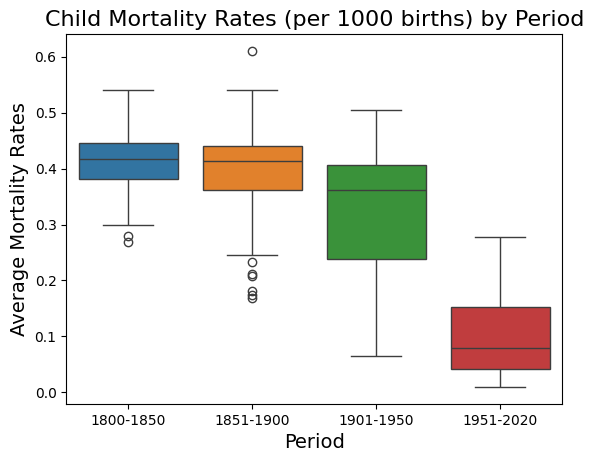

In [5]:
time_periods = final_dataset.drop(columns=["2021-2100", "Region"])
sns.boxplot(data=time_periods)
plt.title("Child Mortality Rates (per 1000 births) by Period", fontsize=16)
plt.xlabel("Period", fontsize=14)
plt.ylabel("Average Mortality Rates", fontsize=14)
# Summary Statistics
print("SUMMARY STATISTICS FOR EACH TIME PERIOD CHRONOLOGICALLY")
def summary_statistics(time_periods):
    mean1 = time_periods["1800-1850"].mean()
    mean2 = time_periods["1851-1900"].mean()
    mean3 = time_periods["1901-1950"].mean()
    mean4 = time_periods["1951-2020"].mean()
    print("Means:", mean1, mean2, mean3, mean4)
    median1 = time_periods["1800-1850"].median()
    median2 = time_periods["1851-1900"].median()
    median3 = time_periods["1901-1950"].median()
    median4 = time_periods["1951-2020"].median()
    print("Medians:", median1, median2, median3, median4)
    range1 = time_periods["1800-1850"].max() - time_periods["1800-1850"].min()
    range2 = time_periods["1851-1900"].max() - time_periods["1851-1900"].min()
    range3 = time_periods["1901-1950"].max() - time_periods["1901-1950"].min()
    range4 = time_periods["1951-2020"].max() - time_periods["1951-2020"].min()
    print("Ranges:", range1, range2, range3, range4)
    std1 = time_periods["1800-1850"].std()
    std2 = time_periods["1851-1900"].std()
    std3 = time_periods["1901-1950"].std()
    std4 = time_periods["1951-2020"].std()
    print("Standard Deviations:", std1, std2, std3, std4)
    IQR1 = time_periods["1800-1850"].quantile(0.75) - time_periods["1800-1850"].quantile(0.25)
    IQR2 = time_periods["1851-1900"].quantile(0.75) - time_periods["1851-1900"].quantile(0.25)
    IQR3 = time_periods["1901-1950"].quantile(0.75) - time_periods["1901-1950"].quantile(0.25)
    IQR4 = time_periods["1951-2020"].quantile(0.75) - time_periods["1951-2020"].quantile(0.25)
    print("IQRs:", IQR1, IQR2, IQR3, IQR4)
summary_statistics(time_periods)

As part of exploring the data to understand trends, distribution, and correlations, we first created a scatterplot to see how mortality rates were distributed across all the countries over four different time periods (from 1800 to the present). We took the mean of each country over each period, and created four columns for each period. By taking the different central and dispersion measures of each period, we can explore how child mortality across countries are different and generally over time. Right away, we noticed that the median and mean average mortality rates decreased as time periods reached closer to the present. In addition, the mean and medians are pretty similar, especially from 1800-1850, where the boxplot appears to show a perfectly symmetrical data disribution. For the more recent time periods, there are clear outliers, like where from 1901-1950, there are more outlier countries that have very low mortality rates than there are outlier countries with very high mortality rates. The statistics and boxplot indicate that more recent periods have more skewed data, where some countries appear to do much better than others. This prompted us to think much about the fact that some regions in the world are more developed, in terms of sanitation, healthcare, and other developmental aspects. This helped us inform our model choice to be a linear regression model, as we saw a correlation with lower mortality rates and time, and a correlation with how certain countries skew the distribution due to potential developmental inequalities. We believed a multiple linear regression model could help predict future mortality rates based on region and time.

<u> **Model Building** </u>

The question we are investigating is the effect time period and region of the world a country is in has on the child mortality rates of the country. We have chosen to create a multiple linear regression model because we want to be able to hopefully accurately predict how being in certain regions of the world in accordance to time period changes a country's child mortality rate. When exploring the data, time period seemed to negatively correlate with child mortality, and it appeared that as time increased, more and more outliers would appear, indicating that there may be regional inequality within the data. Also, child mortality is a numerical, continuous variable which is well-aligned for a linear regression model. A linear regression model works by taking one or more predictor variables to create a linear equation that utilizes the predictor variables to predict a target variable. In our model, we will be using the time period columns and region column (five total predictor variables), and child mortality rate for the future (one target variable). Using Python's sklearn module, we can import an empty linear regression model that can be used to fit our predictor and target variables. The code below will have documentation for the process (sampling, filtering, and fitting).

In [6]:
# Import linear regression model from sklearn
from sklearn.linear_model import LinearRegression
# Sample an 80/20 split for the train and test data
train = final_dataset.sample(frac=0.8)
test = final_dataset.drop(index=train.index)
# Filter predictor and target variables from train and test
X_train = train.drop(columns=["2021-2100", "country", "Region"])
y_train = train.filter(items=["2021-2100"])
X_test = test.drop(columns=["2021-2100", "country", "Region"])
y_test = test.filter(items=["2021-2100"])

In [7]:
# Create an empty linear regression model
lr = LinearRegression(fit_intercept=False)
# Fit the data
lr.fit(X_train, y_train)
# Find the R^2 by using the test data
print(lr.score(X_test, y_test))
# Find the coefficients for the linear equation
print("Coefficients:", lr.coef_) 

0.8006270948786208
Coefficients: [[-0.0034794   0.01977509 -0.03907847  0.19050245]]
